In [1]:
import fastdownload
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastai.vision.widgets import *
from types import SimpleNamespace

In [25]:
#def search_images(keywords, dimension='small', max_images=100):return L(DDGS().images(keywords,size=dimension, max_results=max_images)).itemgot('image')

In [26]:
#urls = search_images('car photos',dimension='small', max_images=1)
#urls[0]

'https://www.sellza.co.za/cars/photos/180x180/180x180_bmw_2003_14758255191.jpeg'

In [27]:
#dest = 'car.jpg'
#url = download_url(urls[0],dest,show_progress=True)

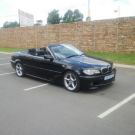

In [28]:
#im = Image.open(dest)
#im.to_thumb(256,256)

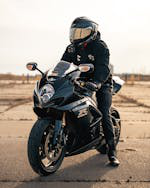

In [31]:
#download_url(search_images('motorcycle photos',dimension='small',max_images=1)[0], 'motorcycle.jpg', show_progress=True)
#Image.open('motorcycle.jpg').to_thumb(256,256)

In [32]:
#searches = 'car','motorcycle'
#path = Path('car_or_motorcycle.jpg')
#from time import sleep
#for o in searches:
#    dest = (path/o)
#    dest.mkdir(parents=True, exist_ok=True)
#    download_images(dest, urls=search_images(f'{o} photo'))
#    sleep(10)

#    #download_images(dest, urls=search_images(f'{o} blue photo'))
#    sleep(10)
#    #download_images(dest, urls=search_images(f'{o} red photo'))
#    #sleep(10)
#    #resize_images(path/o, max_size=200, dest=path/o )

In [33]:
#failed = verify_images(get_image_files(path))
#failed.map(Path.unlink)
#len(failed)


16

In [2]:
path = Path(r'C:\Users\UMER\Practical Deep learning\Practical Deep learning Part 1\Notebooks\car_or_motorcycle.jpg')

In [3]:
from PIL import Image

def is_truncated(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()  # Verify integrity
        return False
    except Exception as e:
        print(f"Error: {e}")
        return True

print(is_truncated("broken_image.jpg"))  # Returns True if corrupted
bad_files = [f for f in get_image_files(path) if is_truncated(f)]
print(f"Found {len(bad_files)} bad images.")
for f in bad_files: os.unlink(f)

Error: [Errno 2] No such file or directory: 'C:\\Users\\UMER\\Practical Deep learning\\Practical Deep learning Part 1\\Notebooks\\broken_image.jpg'
True
Error: Truncated File Read
Error: cannot identify image file 'C:\\Users\\UMER\\Practical Deep learning\\Practical Deep learning Part 1\\Notebooks\\car_or_motorcycle.jpg\\car\\44aa9c14-e07a-4f65-b309-cb143d94d57a.jpg'
Found 2 bad images.


C:\Users\UMER\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


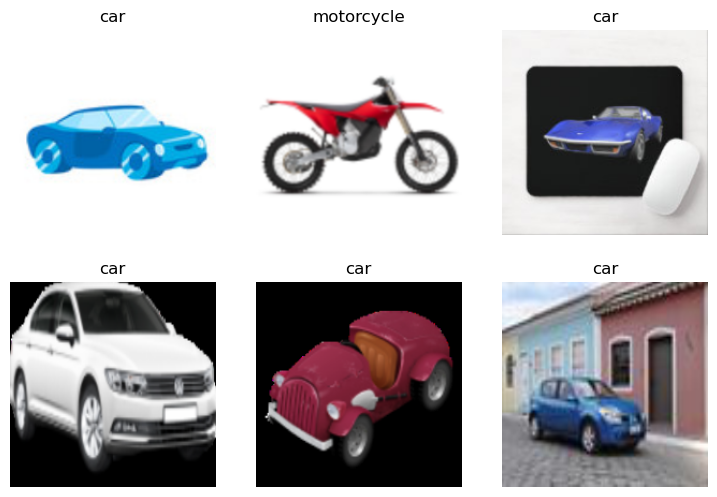

In [4]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [5]:
from torchvision.models import resnet18
import torch
model = resnet18(weights=None)
weights = torch.load(r'C:\Users\UMER\.cache\torch\hub\checkpoints\resnet18-f37072fd (1).pth')
model.load_state_dict(weights)

learn = Learner(dls, model, metrics=error_rate)
learn.fine_tune(3)


epoch,train_loss,valid_loss,error_rate,time
0,2.506257,612.544617,0.742021,20:02


epoch,train_loss,valid_loss,error_rate,time
0,0.165958,1.297427,0.146277,23:56
1,0.095494,0.072383,0.018617,11:06
2,0.055801,0.065027,0.015957,13:17


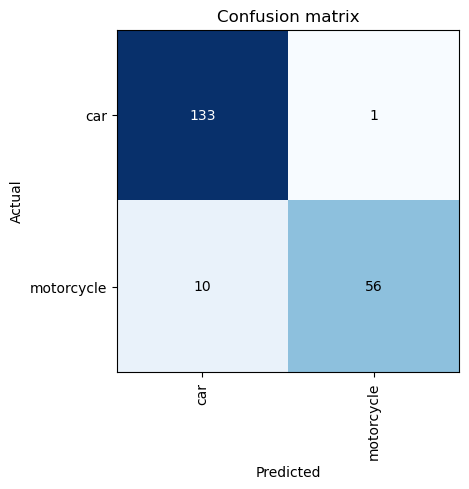

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [14]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(cleaner.fns[idx], path)

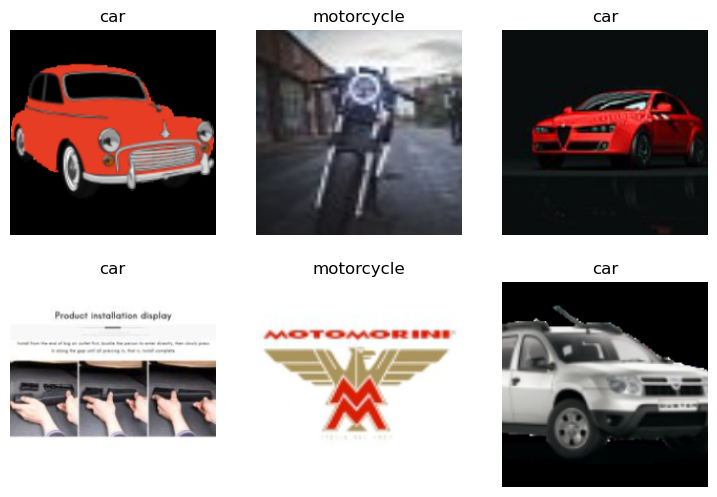

In [15]:
dls = ImageDataLoaders.from_folder(path,
            valid_pct = 0.2,
            item_tfms = Resize(196),
            get_items = partial(get_image_files, exclude_missing=True)
                                           )
#dls.show_batch(max_n=6)

In [41]:
learn =Learner(dls, model, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.232452,12.178639,0.348259,05:49


epoch,train_loss,valid_loss,error_rate,time
0,0.112217,0.104840,0.024876,04:58
1,0.144436,0.350869,0.054726,04:54
2,0.122823,0.082475,0.039801,03:38


In [44]:
learn.export('car_or_motorcycle.pkl')

In [43]:
path = Path()
path.ls(file_exts ='.pkl')

(#0) []

In [6]:
learn.inf = load_learner('car_or_motorcycle.pkl')

C:\Users\UMER\anaconda3\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [9]:
learn.inf.predict(r'C:\Users\UMER\Practical Deep learning\Practical Deep learning Part 1\Notebooks\car_or_motorcycle.jpg\motorcycle/00ced18e-5961-406e-9b8b-1a0eee0f8b71.jpg')

('motorcycle',
 tensor(1),
 tensor([5.1200e-04, 9.9407e-01, 2.7850e-06, 2.7736e-06, 4.3359e-06, 9.3839e-07,
         1.0374e-06, 8.6784e-06, 5.5860e-06, 9.2264e-07, 4.6851e-06, 4.1058e-06,
         1.0130e-05, 5.6915e-06, 4.7684e-06, 7.3646e-06, 3.7193e-06, 2.8092e-06,
         4.8305e-06, 5.2514e-06, 2.8105e-06, 4.7226e-06, 3.2193e-06, 6.1170e-06,
         6.3720e-06, 4.6477e-06, 5.2292e-06, 8.6129e-06, 4.0635e-06, 4.8111e-06,
         5.2576e-06, 6.0489e-06, 5.2268e-06, 2.5687e-06, 3.8497e-06, 1.2235e-06,
         2.6390e-06, 3.4531e-06, 4.9328e-06, 2.3690e-06, 5.1517e-06, 4.1008e-06,
         6.7738e-06, 8.2829e-06, 6.1687e-06, 7.3597e-06, 5.8321e-06, 4.0795e-06,
         3.6035e-06, 3.3595e-06, 3.9668e-06, 1.1726e-05, 3.9544e-06, 1.9008e-06,
         4.7470e-06, 3.2862e-06, 4.5616e-06, 2.9774e-06, 2.0076e-06, 2.9397e-06,
         5.3547e-06, 4.5467e-06, 2.3630e-06, 4.0275e-06, 3.5729e-06, 2.9220e-06,
         4.7439e-06, 3.6017e-06, 2.8081e-06, 4.1560e-06, 1.7802e-06, 3.9012e-06,
 

In [8]:
learn.inf.dls.vocab

['car', 'motorcycle']

In [ ]:
%%sql


In [21]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
from types import SimpleNamespace
btn_upload = SimpleNamespace(data=[r'C:\Users\UMER\Practical Deep learning\Practical Deep learning Part 1\Notebooks\car_or_motorcycle.jpg\motorcycle/00ced18e-5961-406e-9b8b-1a0eee0f8b71.jpg'])

In [26]:
img = PILImage.create(btn_upload.data[-1])

In [19]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl:display(img.to_thumb(128,128))
out_pl


Output()

In [29]:
pred,pred_idx,probs = learn.inf.predict(img)

In [31]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Predictions: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Predictions: motorcycle; Probability: 0.9941')

In [32]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [33]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:display(img.to_thumb(128,128))
    pred, pred_idx,probs = learn.inf.predict(img)
    lbl_pred.value = f'Prediction : {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)


In [34]:
btn_upload = widgets.FileUpload()

In [35]:
VBox([widgets.Label('Choose which picture'),
      btn_upload,btn_run, out_pl, lbl_pred])